# Лабораторная работа №3 «Цифровой спектральный анализ детерминированных сигналов»



In [68]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
import scipy.io.wavfile
import soundfile as sf
import sounddevice as sd
from scipy import signal
from scipy.linalg import dft
from numpy.fft import fft, fftshift
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')
import mylib

import math


def plot(x, y, xlabel, ylabel, title):
    %matplotlib widget
    plt.figure(figsize=[6, 3])
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
def plot_spectre(samples, Fs, xlabel="", ylabel="", title=""):
    %matplotlib widget
    for s in samples:
        plt.plot(np.linspace(-Fs/2, Fs/2, len(s)), np.fft.fftshift(20*np.log10(np.abs(np.fft.fft(s)))))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
# for plotting several plots on the one figure

def plot2(xsPack, ysPack, xlabel, ylabel, title, legendsPack):
    %matplotlib widget
    plt.figure(figsize=[6, 4])
    plt.grid(True)
    for i in range(len(xsPack)):
        plt.plot(xsPack[i], ysPack[i], label= "" if legendsPack[i] == None else legendsPack[i])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    
def stem(x, y, xlabel, ylabel, title):
    %matplotlib widget
    plt.figure(figsize=[8, 3])
    plt.stem(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

def impulse_signal(k, N):
    return 1 if (k < N and k >= 0) else 0

def add_zeros(signal, N):
    res = np.zeros(len(signal) + N, dtype = complex)
    for i in range(len(signal)):
        res[i] = signal[i]
        
    return res

    


# Занятие 1. ДПФ и спектральный анализ.

## Задача 1.1.  Частотная ось ДПФ.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello1.wav' | 'cello2.wav' | 'glockenspiel.wav' | 'vibraphone1.wav' | 'clarinet.wav' | 'guitar.wav' |

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello3.wav' | 'cello4.wav' | 'tuning-fork.wav' | 'vibraphone2.wav' | 'flute.wav' | 'wine-glass.wav' |




Считайте отсчеты дискретного сигнала $x[k]$, содержащегося в аудиофайле Вашего варианта. 

1) Выберите $y[k]$ — часть информативной области сигнала $x[k]$ длиной $2^{14}$ отсчетов. Если в файле меньше $2^{14}$ отсчетов, дополните ее нулями до этого числа отчетов справа.  

2) Постройте с помощью алгоритма БПФ один период ДВПФ сигнала $y[k]$. Укажите расстояние между точками по оси частот. Ось частот приведите в Гц. Определите по графику частоты основных гармонических компонент. 

3) выведите график сигнала $y[k]$ в области, где наблюдается колебание. По графику оцените период этого колебания $T_0$. Сравните частоту $f_0=1/ T_0$ с частотами основных гармоник из п.2.



In [69]:
samples, Fs = sf.read("./dataset/vibraphone2.wav")
sd.play(samples, Fs)

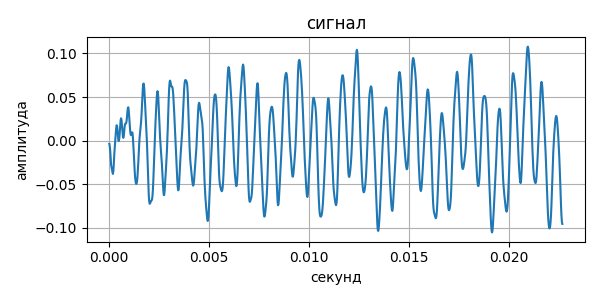

In [70]:
plot(np.arange(len(samples[:1000])) / Fs, samples[:1000], "секунд", "амплитуда", "сигнал")
samples = samples[:2**14]



ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


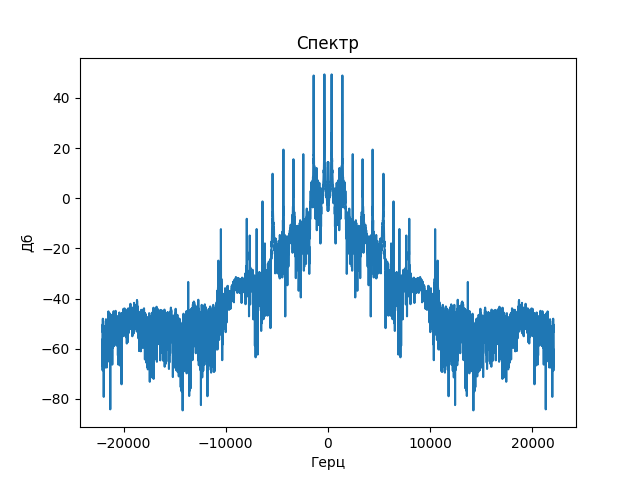

2.691650390625


In [71]:
plot_spectre([samples], Fs, "Герц", "Дб", "Спектр")
print(Fs / len(samples))

Между точками на оси частот расстояние $\Delta f = \frac{F_s}{N}=2.69\text{Гц}$

Пункт 3 - найдем частоты из временного представления сигнала

In [72]:
frequencies = np.array([
    1 / (0.01095 - 0.01021),
    1 / (0.012379 - 0.00949)
])
print(frequencies)

[1351.35135135  346.14053306]


На графике спектра нашел 1400 Гц и 350 Гц

## Задача 1.2. Задача распознавания спектральных компонент. 

Считайте последовательность $x[k]$ из файла Вашего варианта (`variant_Nv_ex_1_2.npy`, где `Nv` — номер варианта). Известно, что ее аналитическая запись  имеет вид 

$$x[k]=\sum\limits_{m=1}^{M}{{{A}_{m}}}\sin (2\pi \frac{m}{N}k+{{\varphi }_{m}}),\quad k=0,\ 1,\ 2,\ \ldots ,\ N-1,$$


где $N$ — длина последовательности, $M<(N-1)/2$, относительные частоты гармонических компонент совпадают с бинами ДПФ. Определите число компонент,  их амплитуды ${{A}_{m}}$ и фазы ${{\varphi }_{m}}$, $m=1,\dots, M$.


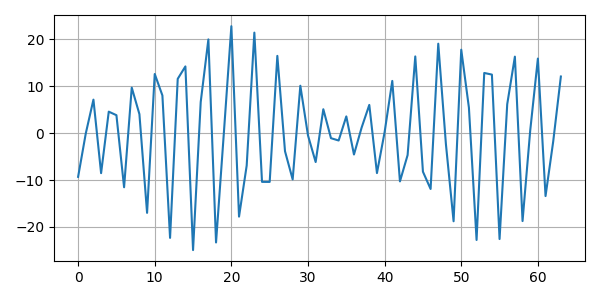

In [73]:
Nv=10
x = np.load('./dataset/variant_%i_ex_1_2.npy' %Nv )

plot(np.arange(len(x)), x, "", "", "")

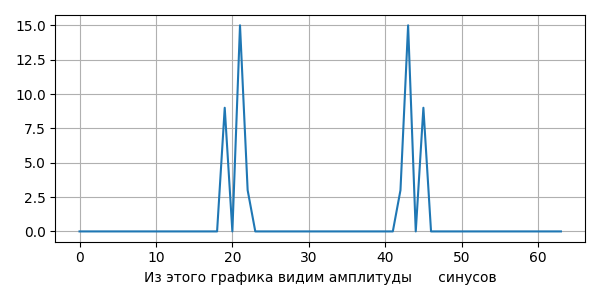

64


In [74]:
plot(np.arange(len(x)), np.abs(fft(x)) / len(x) * 2, "Из этого графика видим амплитуды \
     синусов", "", "")
print(len(x))

Из графика выше видим амплитуды имеющихся синусов. Также понимаем их частоты: $\nu_1 = \frac{19}{N}, \nu_2 = \frac{21}{N}$, $N = 64$

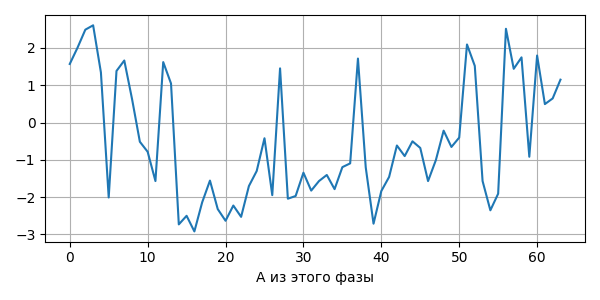

-2.3239476077570913 -2.228266259194368


In [75]:
angles = ((np.pi / 2 + np.angle(fftshift(fft(x)))) + np.pi) % (2 * np.pi) - np.pi
plot(np.arange(len(x)), angles, "А из этого фазы", "", "")
print(angles[19], angles[21])


# Занятие 2. Окна в спектральном анализе.

## Задача 2.1. Исследование характеристик различных окон.
Рассмотрите следующие окна для ДПФ длиной в $N=20+2N_v$, где $N_v $ — номер Вашего варианта:

1) прямоугольное (`boxcar`),

2) Бартлетта (`bartlett`),

3) Ханна (`hann`),

4) Хэмминга (`hamming`),

5) Блэкмана (`blackman`),

6) окно с плоской вершиной (`flattop`).

Постройте графики для окон во временной области, амплитудно-частотной характеристики окон в линейном масштабе и в дБ. По графикам для каждого окна оцените следующие параметры:

* ширину $\Delta \nu$ главного лепестка на уровне половинной мощности,

* максимальный уровень боковых лепестков относительно главного в дБ,

* асимптотическую скорость спада боковых лепестков в дБ/октава. 

Составьте таблицу с результатами. 


In [76]:
N = 20 + 20
def boxcar(k):
    return 1 if k < N and k >= 0 else 0

def bartlett(k):
    return 1 - 2 / N * abs(k - N / 2) if k < N and k >= 0 else 0

def hann(k):
    return 1 / 2 - 1 / 2 * np.cos(2 * np.pi * k / N) if k < N and k >= 0 else 0

def hamming(k):
        return 0.54 - 0.46 * np.cos(2 * np.pi * k / N) if k < N and k >= 0 else 0
    
def blackman(k):
    return 0.42 \
            - 0.5 * np.cos(2 * np.pi * k / N) \
            + 0.08 * np.cos(4 * np.pi * k / N) \
            if k < N and k >= 0 else 0
            
def flattop(k):
    a = np.array([0.21557895, 0.41663158, 0.27263158, 0.083578947, 0.006947368])
    one = 1
    result = 0
    
    if k < N and k >= 0:
        for r in range(5):
          result += one * a[r] * np.cos(2 * np.pi * r * k / N)
          one *= -1
        return result  
    else:
        return 0


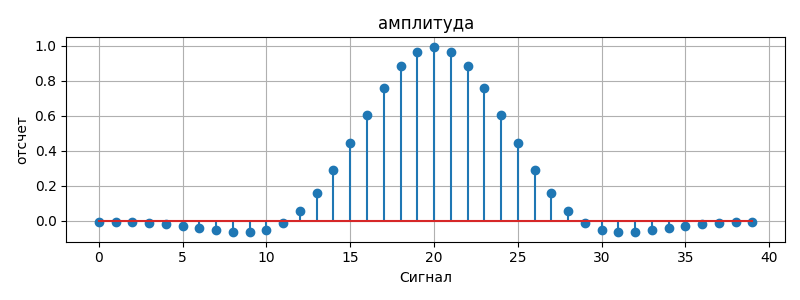

In [77]:
M = 5000 # Лучше брать четное
mSignal = np.array([flattop(k) for k in range(M)])
mSpectre = fftshift(fft(mSignal))
mAxis = np.arange(M) - M // 2
stem(np.arange(N), mSignal[:N], "Сигнал", "отсчет", "амплитуда")

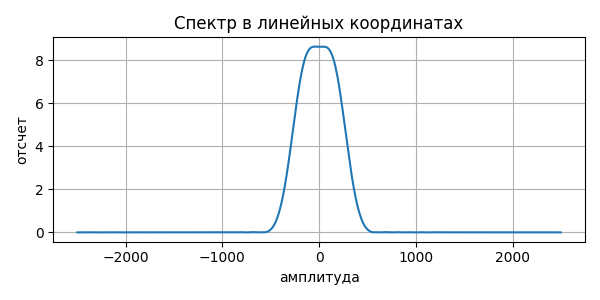

In [78]:
plot(mAxis, np.abs(mSpectre),"амплитуда" ,"отсчет", "Спектр в линейных координатах")

In [79]:
_, spectreMax = mylib.find_max_with_index_in_range(mAxis, np.abs(mSpectre), -M, M)

halfPowerNu = mylib.find_zero_in_range(mAxis, np.abs(mSpectre) - spectreMax / 2, 0, M)
deltaNu = 2 * (halfPowerNu / M) * N # в бинах
print(deltaNu / N)
# stem(mAxis, np.abs(mSpectre) - spectreMax / 2,"амплитуда" ,"отсчет", "Спектр в линейных координатах")

0.1136


Из смещенного на половину  получаем  ширину главного спектрального лепестка 

8.62937556415481


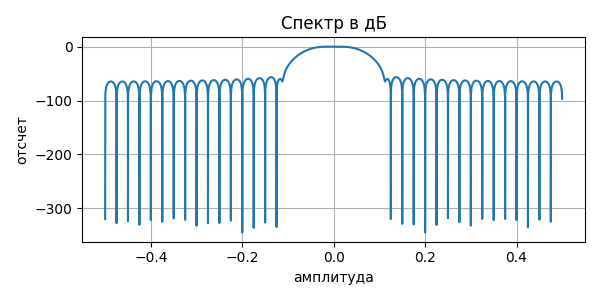

In [80]:
print(spectreMax)
mSpectreDB = 20 * np.log10(np.abs(mSpectre) / spectreMax)
        
plot(mAxis / M, mSpectreDB, "амплитуда", "отсчет", "Спектр в дБ")

/tmp/ipykernel_260/2505426521.py:2: RuntimeWarning: divide by zero encountered in log2
  base = np.log2(np.arange(M // 2))


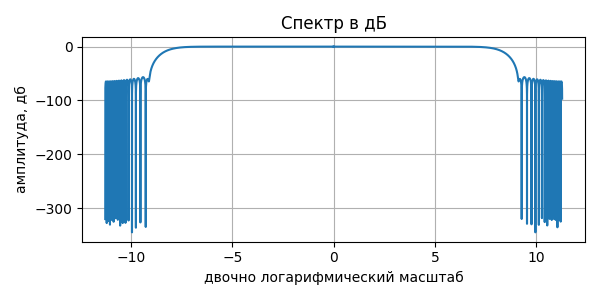

In [81]:
# base = np.log2(1 + np.arange(M // 2) / (M // 2 - 1))
base = np.log2(np.arange(M // 2))
mAxisBB = np.zeros(M)
mAxisBB[M // 2:] = base
mAxisBB[:M // 2] = -1 * np.flip(base)
# print(mAxisBB)
plot(mAxisBB, mSpectreDB, "двочно логарифмический масштаб","амплитуда, дб", 
     "Спектр в дБ")

## Задача 2.2. Окно Кайзера.
Повторите вычисления задачи 2.1 для окна Кайзера с параметром $\beta =0;\ \ 5;\ \ 6;\ \ 8,6$. Сравните полученные результаты с предыдущей задачей. 


/tmp/ipykernel_260/1984738835.py:34: RuntimeWarning: divide by zero encountered in log10
  mSpectresDB[i] = 20 * np.log10(mSpectres[i] / maxVal)


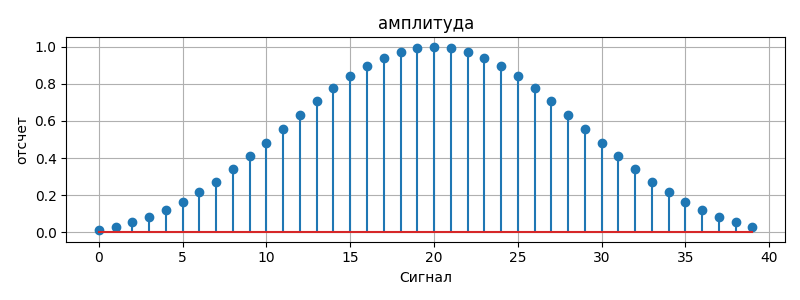

In [82]:
N = 40

def kaizer(k, beta):
    def calc_I0(x):
        res = 1
        power = x / 2 
        fact = 1
        for i in range(1, 25):
            fact *= i
            res += (power / fact)**2
            power *= x / 2
        return res
    
    if k >= 0 and k < N:
        return calc_I0(beta * np.sqrt(1 - (2 * k / N - 1)**2)) / \
               calc_I0(beta)
    else:
        return 0    
    
    
betas = np.array([0., 5., 6., 8.6])

M = 1000 # Лучше брать четное
mAxis = np.arange(M) - M // 2
mAxises = np.zeros((len(betas), M))
mSignals = np.zeros((len(betas), M))
mSpectres = np.zeros((len(betas), M))
mSpectresDB = np.zeros((len(betas), M))
for i in range(len(betas)):
    mSignals[i] = np.array([kaizer(k, betas[i]) for k in range(M)])
    mSpectres[i] = np.abs(fftshift(fft(mSignals[i])))
    
    _, maxVal = mylib.find_max_with_index_in_range(mAxis, mSpectres[i], 0, M)
    mSpectresDB[i] = 20 * np.log10(mSpectres[i] / maxVal)
    mAxises[i] = mAxis
    
stem(np.arange(N), mSignals[2][:N], "Сигнал", "отсчет", "амплитуда")

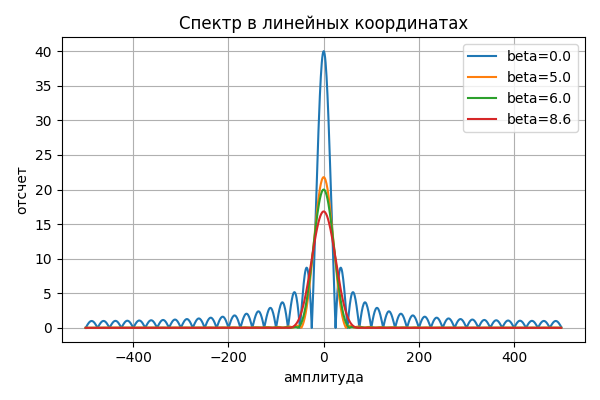

In [83]:

plot2(mAxises, [np.abs(spectre) for spectre in mSpectres],"амплитуда" ,"отсчет", "Спектр в линейных координатах",
      [f"beta={beta}" for beta in betas])

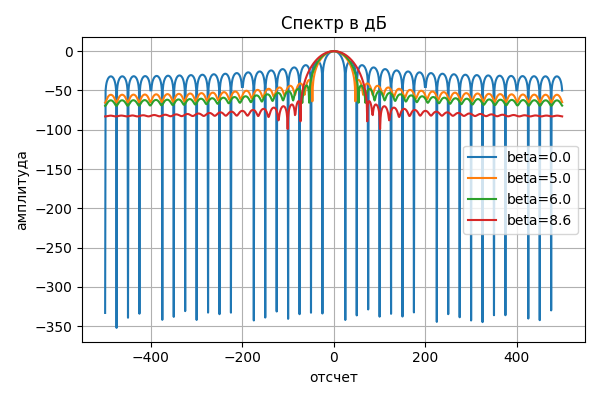

In [84]:
plot2(mAxises, [spectre for spectre in mSpectresDB],"отсчет", "амплитуда", "Спектр в дБ",
      [f"beta={beta}" for beta in betas])

получили следующие уровни боковых лепестков:
-13 db, -36 db, -43 db, -63 db для $\beta = 0, 5, 6, 8.6$ соответственно 



## Задача 2.3. Окно Чебышева.
Получите окно Чебышева для четырех уровней боковых лепестков, которые получились в задаче 2.2. Сравните ширину главного лепестка на уровне половинной мощности с результатами предыдущих задач. 


/home/vlad/.local/lib/python3.8/site-packages/scipy/signal/windows/_windows.py:1436: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


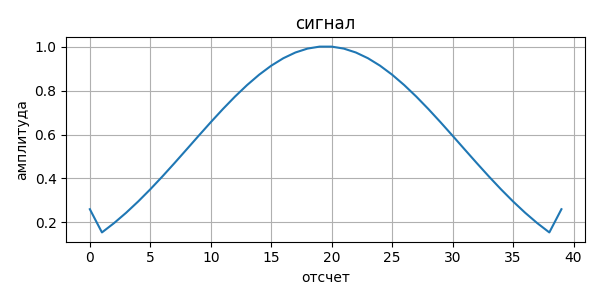

In [85]:
N = 40
betas = np.array([13., 36., 43., 63.])


sig = signal.windows.chebwin(M=N, at=betas[1], sym=True)
spectre = fftshift(np.fft.fft(sig, 2048))
plot(np.arange(N), sig, "отсчет", "амплитуда", "сигнал")

24.350106935982488


/tmp/ipykernel_260/3869815683.py:3: RuntimeWarning: divide by zero encountered in log10
  spectreDB = 20 * np.log10(np.abs(spectre) / maxVal)


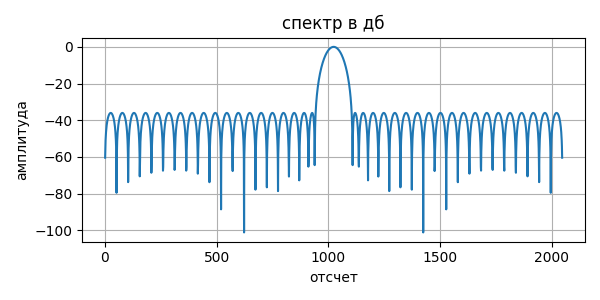

In [86]:
_, maxVal = mylib.find_max_with_index_in_range(np.arange(2048), np.abs(spectre), 0, 2048)
print(maxVal)
spectreDB = 20 * np.log10(np.abs(spectre) / maxVal)
plot(np.arange(2048), spectreDB, "отсчет", "амплитуда", "спектр в дб")

## Задача 2.4. Различимость спектральных компонент.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11 | 15 | 18 | 17 | 32 | 48 | 15 | 18 | 47 | 32 | 40 | 38 |
|$\beta_0$| 1.1| 1.5 | 1.2 | 1.5 | 1.1 | 1.3 | 1.1 | 1.4 | 1.5 | 1.3 | 1.2 | 1.1 |
|$\beta_1$| 5 | 5.5 | 6.2 | 5.7 | 6.1 | 4.9 | 5.1 | 5.7 | 6 | 5.8 | 5.7 | 5.5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) окном Кайзера с параметром $\beta=\beta_0.$,

 б) окном Кайзера с параметром $\beta=\beta_1.$
 
 в) окном Блэкмана.
 
Значения параметров $n_0$ и $\beta=\beta_1$ определите из таблицы. Ответьте на следующие вопросы.
 
1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков оконной функции на результат спектрального анализа? 


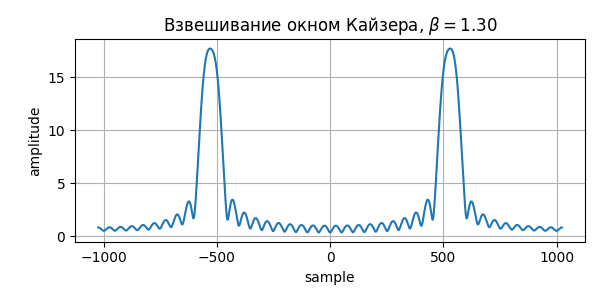

In [87]:
betas = np.array([1.3, 5.8])
n0 = 32
M = 2048

mSignal = np.array([np.cos(2 * np.pi * n0 / 128 * k) + np.cos(2 * np.pi * (n0 + 2) / 128 * k) for k in range(128)])
mAxis = np.arange(M) - M // 2

def get_kaizer(beta):
    return np.array([kaizer(k, beta) for k in range(128)])
mSpectre = fftshift(fft(mSignal * get_kaizer(betas[0]), M))


plot(mAxis, np.abs(mSpectre), "sample", "amplitude", r"Взвешивание окном Кайзера, $\beta=%.2f$"%(betas[0]))            

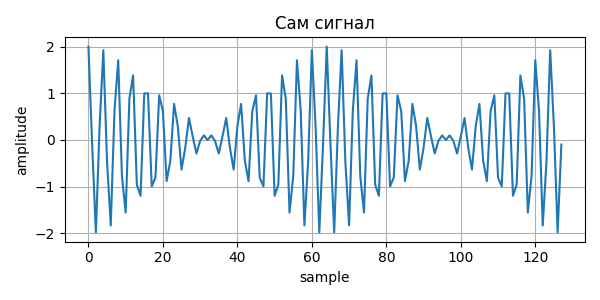

In [88]:
plot(np.arange(128), mSignal, "sample", "amplitude", "Сам сигнал")            

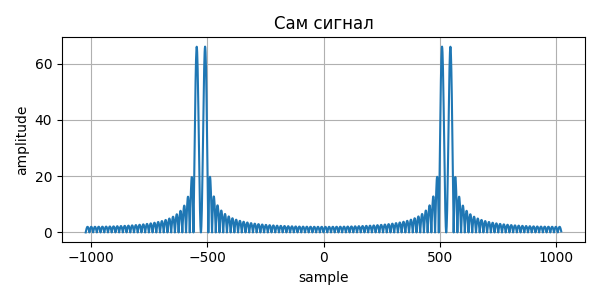

In [89]:
plot(mAxis, np.abs(fftshift(fft(mSignal, M))), "sample", "amplitude", "Сам сигнал")

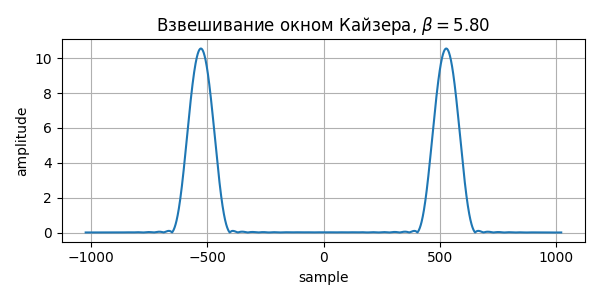

In [90]:
mSpectre = fftshift(fft(mSignal * get_kaizer(betas[1]), M))
plot(mAxis, np.abs(mSpectre), "sample", "amplitude", r"Взвешивание окном Кайзера, $\beta=%.2f$"%(betas[1]))

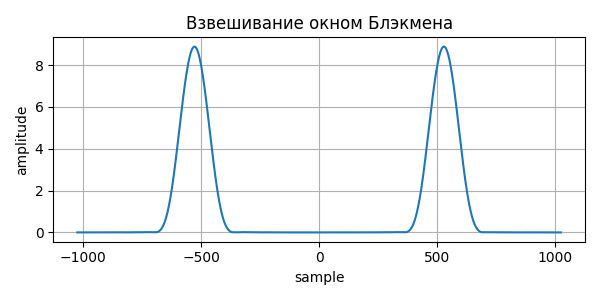

In [91]:
mSpectre = fftshift(fft(mSignal * np.array([blackman(k) for k in range(128)]), M))
plot(mAxis, np.abs(mSpectre), "sample", "amplitude", r"Взвешивание окном Блэкмена")

## Задача 2.5. Маскировка слабой гармоники боковыми лепестками окна.


| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Бартлетта | Ханна | Хэмминга | Ханна | Бартлетта | Хэмминга |
| $m_2$ |    -2     |     2    |   -2    |     2    |   -2    |     2    |
| $m_3$ |     4     |     6    |    3    |     4    |    5    |     7    |


| Варианты: |       7      |     8     |         9        |      10     |        11       |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Хэмминга | Ханна | Бартлетта | Ханна | Хэмминга | Бартлетта |
| $m_2$ |      2     |   -2    |     2    |   -2    |     2    |   -2    |
| $m_3$ |      7     |    3    |    -3    |   -4    |     5    |    4    |

Сгенерировать последовательность отсчетов гармонического сигнала $x[k]$ длительностью $N=64$, которая может быть описана следующей формулой:
$$x[k]=a_1 \sin\left(2\pi k \frac{n}{N}\right) + a_2 \cos\left(2\pi k \frac{n+m_2}{N}\right) - a_3\sin\left(2\pi k \frac{n+m_3}{N}\right),$$
где $a_1 = n = n_\text{v}+10$ ($n_\text{v}$ — номер вашего варианта), $a_2 = \dfrac{a_1}{6}$, $a_3 = \dfrac{a_1}{2}$, $m_2$  и  $m_3$  значения из таблицы, соответствующие вашему варианту.

* Построить ДВПФ $x[k]$, применив прямоугольное окно. Сколько гармонических компонент можно выделить?

* Построить ДВПФ $x[k]$, применив окно Блэкмана. Какие гармонические компоненты наблюдаются теперь?

* Построить ДВПФ $x[k]$, используя окно $w_1[k]$ из вашего варианта. Получилось ли пронаблюдать все гармонические компоненты?

* Подобрать коэффициенты для окон Чебышева и Кайзера так, чтобы возможно было наблюдать все гармонические компоненты. Построить соответствующие графики.**

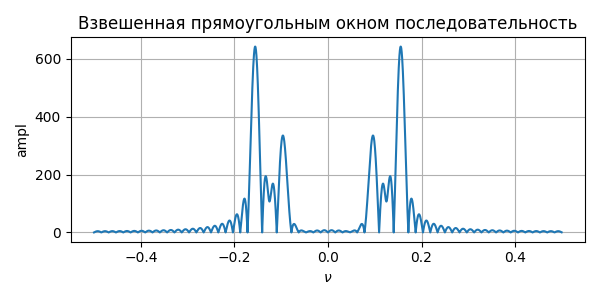

In [92]:
N = 64
n = 10
alpha1 = 10 + 10
alpha2 = alpha1 / 6
alpha3 = alpha1 / 2
m2 = -2
m3 = -4
mSignal = np.array([alpha1 * np.sin(2 * np.pi * k * n / N) 
                    + alpha2 * np.cos(2 * np.pi * k * (n + m2) / N)
                    - alpha3 * np.sin(2 * np.pi * k * (n + m3) / N) for k in range(N)])

window = np.array([boxcar(k) for k in range(N)])
mSpectre = fftshift(fft(mSignal * window, M))
mAxis = (np.arange(M) - M // 2) / (M)
plot(mAxis, np.abs(mSpectre), r"$\nu$", "ampl", "Взвешенная прямоугольным окном последовательность")

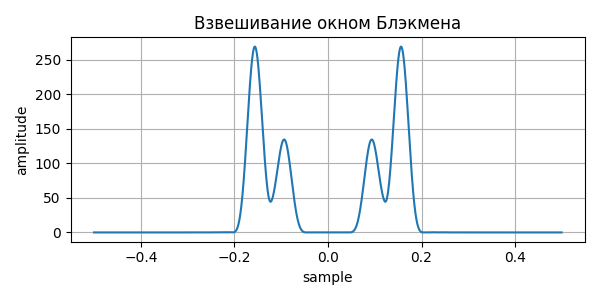

In [93]:
window = np.array([blackman(k) for k in range(N)])
mSpectre = fftshift(fft(mSignal * window, M))
plot(mAxis, np.abs(mSpectre), "sample", "amplitude", r"Взвешивание окном Блэкмена")

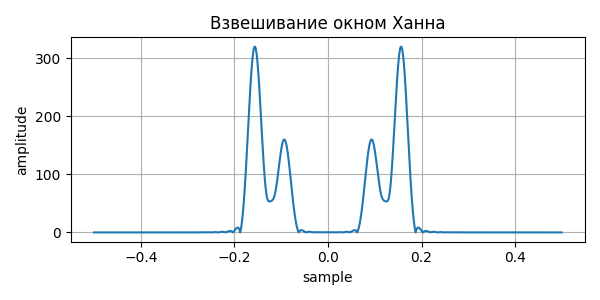

In [94]:
window = np.array([hann(k) for k in range(N)])
mSpectre = fftshift(fft(mSignal * window, M))
plot(mAxis, np.abs(mSpectre), "sample", "amplitude", r"Взвешивание окном Ханна")

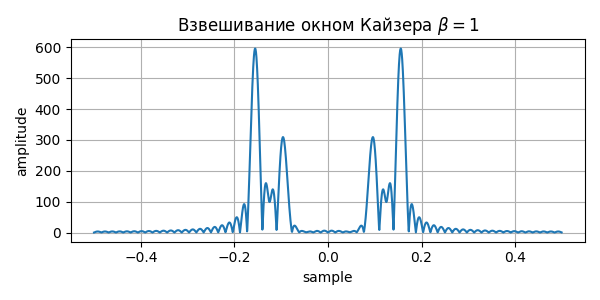

In [95]:
window = np.array([kaizer(k, 1) for k in range(N)])
mSpectre = fftshift(fft(mSignal * window, M))
plot(mAxis, np.abs(mSpectre), "sample", "amplitude", r"Взвешивание окном Кайзера $\beta = 1$")

/home/vlad/.local/lib/python3.8/site-packages/scipy/signal/windows/_windows.py:1436: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


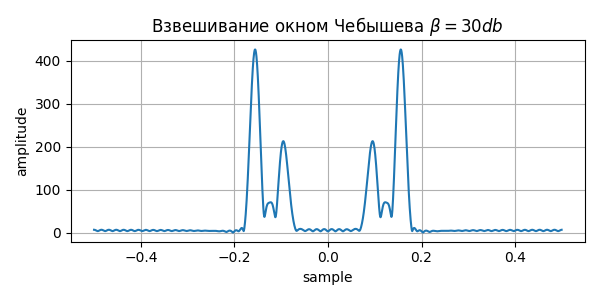

In [96]:
window = signal.windows.chebwin(N, 30)
mSpectre = fftshift(fft(mSignal * window, M))
plot(mAxis, np.abs(mSpectre), "sample", "amplitude", r"Взвешивание окном Чебышева $\beta = 30db$")

## Задача 2.6. Амплитудная модуляция спектра.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11,5 | 15,5 | 18,5 | 17,5 | 32,5 | 48,5 | 15,5 | 18,5 | 47,5 | 32,5 | 40,5 | 38,5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=128$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) прямоугольным окном (`boxcar`),

 б) окном с плоской вершиной (`flattop`).
 
 
Значение параметра $n_0$ определите из таблицы. Отнормируйте ДПФ на значение АЧХ оконной функции на нулевой частоте ($W(0)=\sum_{k=0}^{N-1} w[k]$). Для двух окон сравните амплитуду гармоники с модулем ближайших к ней отсчетов ДПФ.

64.0


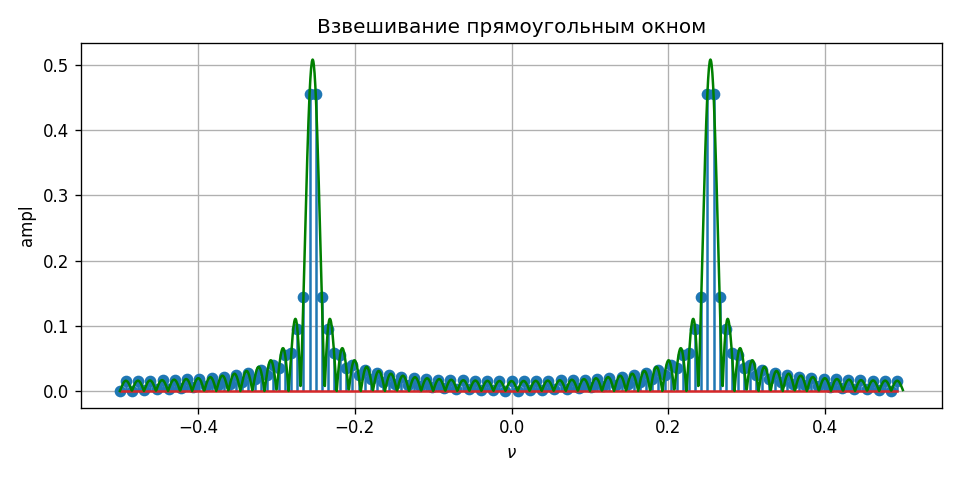

In [97]:
n0 = 32.5
M = 128
mAxis = (np.arange(M) - M // 2) / M
mSignal = np.array([np.cos(2 * np.pi * n0 / M * k) for k in range(128)])
window = np.array([boxcar(k) for k in range(M)])
_, windowMax = mylib.find_max_with_index_in_range(mAxis, np.abs(fft(window)), -1, 1)
print(windowMax)
mSpectre = fftshift(fft(mSignal * window, M)) / windowMax
dtft = fftshift(fft(mSignal * window, 2048)) / windowMax
mAxisDtft = (np.arange(2048) - 2048 // 2) / 2048
# stem(mAxis, np.abs(mSpectre), r"frequency, \nu", "ampl", "Сигнал с прямоугольным окном")
# plot(mAxisDtft, dtft, r"frequency, \nu", "ampl", "Сигнал с прямоугольным окном")


plt.figure(figsize=[8, 4], dpi=120)
plt.stem(mAxis, np.abs(mSpectre))
plt.plot(mAxisDtft, np.abs(dtft), color="green")
plt.xlabel(r'$\nu$')
plt.ylabel('ampl')
plt.title('Взвешивание прямоугольным окном')
plt.grid()
plt.tight_layout()
plt.show()


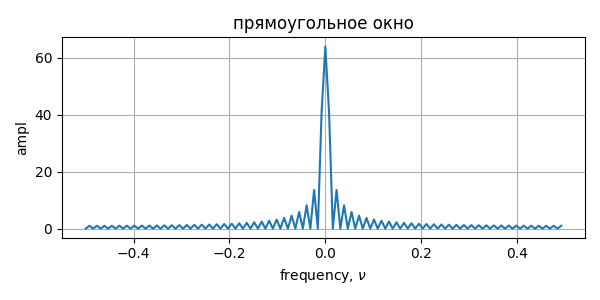

In [98]:
plot(mAxis, np.abs(fftshift(fft(window))), r"frequency, $\nu$", "ampl", "прямоугольное окно")

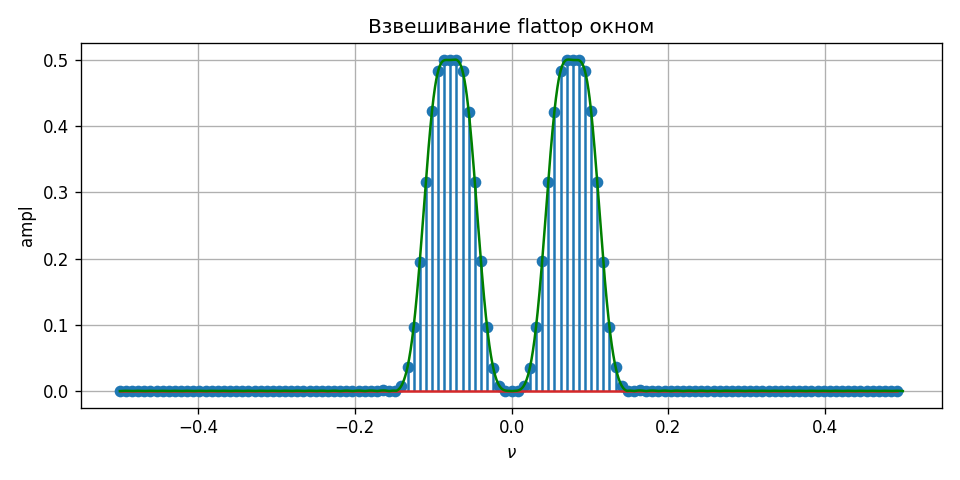

In [99]:
n0 = 32.5
M = 128
mAxis = (np.arange(M) - M // 2) / M
mSignal = np.array([np.cos(2 * np.pi * n / M * k) for k in range(128)])
window = np.array([flattop(k) for k in range(M)])
_, windowMax = mylib.find_max_with_index_in_range(mAxis, np.abs(fft(window)), -1, 1)

mSpectre = fftshift(fft(mSignal * window, M)) / windowMax
dtft = fftshift(fft(mSignal * window, 2048)) / windowMax
mAxisDtft = (np.arange(2048) - 2048 // 2) / 2048
# stem(mAxis, np.abs(mSpectre), r"frequency, \nu", "ampl", "Сигнал с прямоугольным окном")
# plot(mAxisDtft, dtft, r"frequency, \nu", "ampl", "Сигнал с прямоугольным окном")


plt.figure(figsize=[8, 4], dpi=120)
plt.stem(mAxis, np.abs(mSpectre))
plt.plot(mAxisDtft, np.abs(dtft), color="green")
plt.xlabel(r'$\nu$')
plt.ylabel('ampl')
plt.title('Взвешивание flattop окном')
plt.grid()
plt.tight_layout()
plt.show()


# Занятие 3. Кратковременное дискретное преобразование Фурье (STFT) 

## Задача 3.1. Спектрограмма аудиофайла.  

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'clarinet_minor.wav' | 'clarinet_major32.wav'| 'major_scale_flute1.wav' | 'major_scale_flute2.wav'|'major_scale_flute3.wav' | 'major_scale_flute4.wav'|

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'major_scale_flute5.wav'|'major_scale_piano2.wav'|'major_scale_piano3.wav'|'single_notes.wav'|'violin_natural_minor.wav'|'violin_natural_minor_up.wav'|


Вычислите кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле Вашего варианта. Изобразите спектрограмму сигнала. Длину окна (размер кадра), тип оконной функции, число точек в перекрытии, масштабы осей и размерность ДПФ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равен размер кадра в секундах и как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте у данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,

* б) длина окна,

* в) размерность ДПФ (за счет дополнения нулевыми отсчетами)?


In [100]:
from scipy.io import wavfile
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot

fs, x = wavfile.read('./dataset/single_notes.wav')
import sounddevice as sd
sd.play(x, fs)

In [ ]:
nperseg = 200
noverlap = 0
nfft = 1000
# signal.windows.blackman
f, t, Zxx = signal.stft(x, fs=fs, window=('blackman'), nperseg=nperseg, noverlap=noverlap, nfft=nfft)
plt.figure(figsize=[13.5, 5], dpi=70)

plt.pcolormesh(t, f, np.abs(Zxx), cmap=plt.get_cmap('Purples'), shading='auto')

plt.ylim([0, 2000])
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()

## Задача 3.2. Спектрограмма ЛЧМ сигнала. 

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$f_0$, Гц | 170| 80 | 90 | 75 | 120 | 130 | 85 | 95 | 70 | 65 | 110 | 105 |
|$f_1$, Гц | 800 | 900 | 850 | 870 | 820 | 875 | 780 | 810 | 790 | 825 | 830 | 840 |

Постройте спектрограмму c окном Блэкмана для ЛЧМ-сигнала длительностью $T=2$ секундам, мгновенная частота которого изменяется от $f_0$ до $f_1$, частота дискретизации $f_s=2000$ Гц. Начальный размер кадра (`nperseg`) выберите $H=512$ отсчетов. Пронаблюдайте, как изменяется спектрограмма при изменении следующих параметров:
* тип оконной функции (`window`),
* длина кадра (`nperseg`),
* размерность ДПФ (`nfft`).

In [ ]:
fs=2000
f0=65
f1=825
t=np.arange(0, 2, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

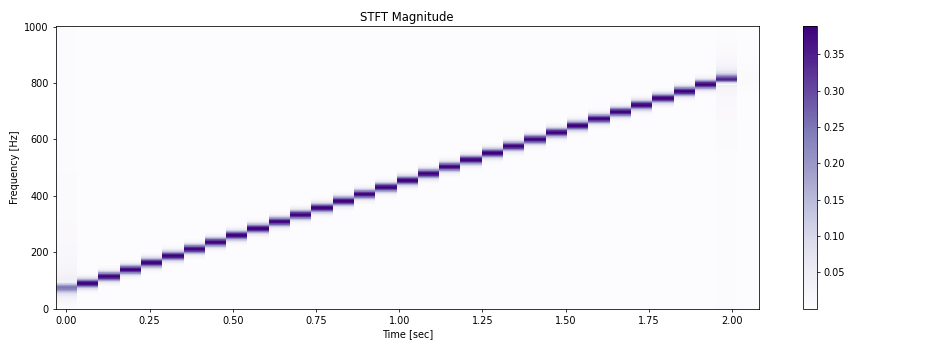

In [ ]:
nperseg = 256
noverlap = 128
nfft = 1024
# signal.windows.blackman
f, t, Zxx = signal.stft(x, fs=fs, window=('cheb', 60), nperseg=nperseg, noverlap=noverlap, nfft=nfft)
plt.figure(figsize=[13.5, 5], dpi=70)

plt.pcolormesh(t, f, np.abs(Zxx), cmap=plt.get_cmap('Purples'), shading='auto')

# plt.ylim([0, 3000])
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()

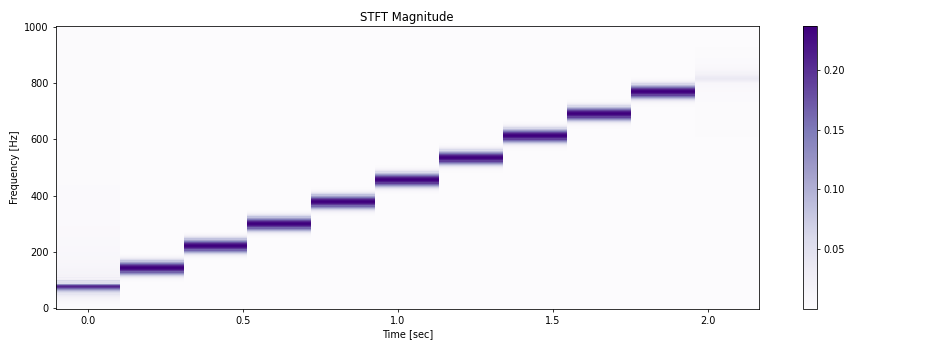

In [ ]:
nperseg = 512
noverlap = 100
nfft = 512
# signal.windows.blackman
f, t, Zxx = signal.stft(x, fs=fs, window=('blackman'), nperseg=nperseg, noverlap=noverlap, nfft=nfft)
plt.figure(figsize=[13.5, 5], dpi=70)

plt.pcolormesh(t, f, np.abs(Zxx), cmap=plt.get_cmap('Purples'), shading='auto')

# plt.ylim([0, 3000])
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()